<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(_0_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.952716,88.009487,-0.121752,171.840451,171.971890,-0.131438
1,0.0,1.0,59.236369,65.565570,0.103031,134.904971,134.811179,0.093792
2,0.0,2.0,48.038207,92.922145,-0.144157,150.816195,151.008159,-0.191965
3,0.0,3.0,76.274417,61.501192,-0.134424,147.641185,147.759055,-0.117870
4,0.0,4.0,72.048437,83.230814,0.176655,165.455905,165.287238,0.168667
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,24.218805,98.105414,0.144618,132.468836,132.339200,0.129636
249996,999.0,246.0,33.259128,43.242452,0.136536,86.638116,86.512402,0.125714
249997,999.0,247.0,68.508971,22.662928,-0.150436,101.021463,101.156844,-0.135381
249998,999.0,248.0,78.049647,42.805925,-0.159272,130.696300,130.832228,-0.135928


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    73.952716  88.009487 -0.121752  171.840451  171.971890 -0.131438
      1.0    59.236369  65.565570  0.103031  134.904971  134.811179  0.093792
      2.0    48.038207  92.922145 -0.144157  150.816195  151.008159 -0.191965
      3.0    76.274417  61.501192 -0.134424  147.641185  147.759055 -0.117870
      4.0    72.048437  83.230814  0.176655  165.455905  165.287238  0.168667
...                ...        ...       ...         ...         ...       ...
999.0 245.0  24.218805  98.105414  0.144618  132.468836  132.339200  0.129636
      246.0  33.259128  43.242452  0.136536   86.638116   86.512402  0.125714
      247.0  68.508971  22.662928 -0.150436  101.021463  101.156844 -0.135381
      248.0  78.049647  42.805925 -0.159272  130.696300  130.832228 -0.135928
      249.0  44.476736  96.428932  0.004615  150.910283  150.905271  0.005012

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    73.952716  88.009487 -0.121752  171.840451  171.971890 -0.131438
      1.0    59.236369  65.565570  0.103031  134.904971  134.811179  0.093792
      2.0    48.038207  92.922145 -0.144157  150.816195  151.008159 -0.191965
      3.0    76.274417  61.501192 -0.134424  147.641185  147.759055 -0.117870
      4.0    72.048437  83.230814  0.176655  165.455905  165.287238  0.168667
...                ...        ...       ...         ...         ...       ...
999.0 245.0  24.218805  98.105414  0.144618  132.468836  132.339200  0.129636
      246.0  33.259128  43.242452  0.136536   86.638116   86.512402  0.125714
      247.0  68.508971  22.662928 -0.150436  101.021463  101.156844 -0.135381
      248.0  78.049647  42.805925 -0.159272  130.696300  130.832228 -0.135928
      249.0  44.476736  96.428932  0.004615  150.910283  150.905271  0.005012

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.952716,88.009487,-0.121752,171.840451,171.971890,-0.131438
1,0.0,1.0,59.236369,65.565570,0.103031,134.904971,134.811179,0.093792
2,0.0,2.0,48.038207,92.922145,-0.144157,150.816195,151.008159,-0.191965
3,0.0,3.0,76.274417,61.501192,-0.134424,147.641185,147.759055,-0.117870
4,0.0,4.0,72.048437,83.230814,0.176655,165.455905,165.287238,0.168667
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,24.218805,98.105414,0.144618,132.468836,132.339200,0.129636
249996,999.0,246.0,33.259128,43.242452,0.136536,86.638116,86.512402,0.125714
249997,999.0,247.0,68.508971,22.662928,-0.150436,101.021463,101.156844,-0.135381
249998,999.0,248.0,78.049647,42.805925,-0.159272,130.696300,130.832228,-0.135928


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    73.952716  88.009487 -0.121752  171.840451  171.971890 -0.131438
      1.0    59.236369  65.565570  0.103031  134.904971  134.811179  0.093792
      2.0    48.038207  92.922145 -0.144157  150.816195  151.008159 -0.191965
      3.0    76.274417  61.501192 -0.134424  147.641185  147.759055 -0.117870
      4.0    72.048437  83.230814  0.176655  165.455905  165.287238  0.168667
...                ...        ...       ...         ...         ...       ...
999.0 245.0  24.218805  98.105414  0.144618  132.468836  132.339200  0.129636
      246.0  33.259128  43.242452  0.136536   86.638116   86.512402  0.125714
      247.0  68.508971  22.662928 -0.150436  101.021463  101.156844 -0.135381
      248.0  78.049647  42.805925 -0.159272  130.696300  130.832228 -0.135928
      249.0  44.476736  96.428932  0.004615  150.910283  150.905271  0.005012

[250000 rows x 6 columns]

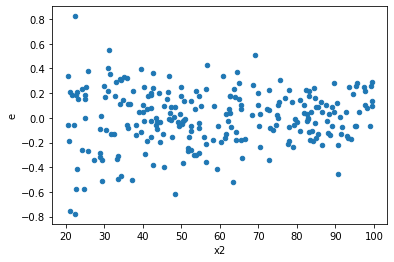

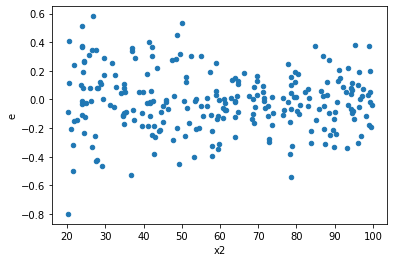

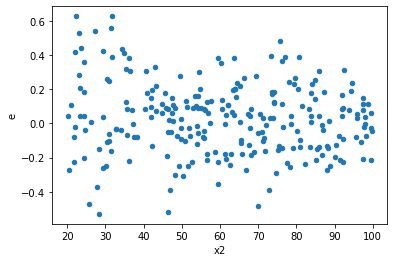

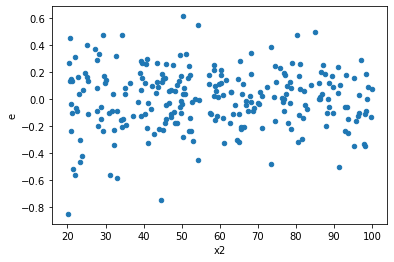

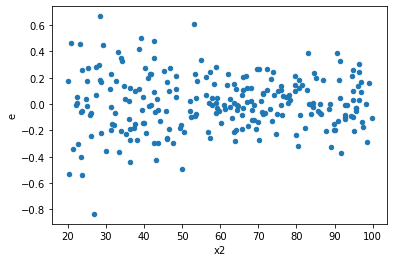

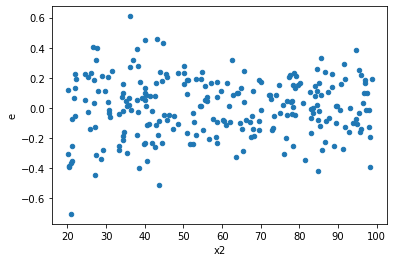

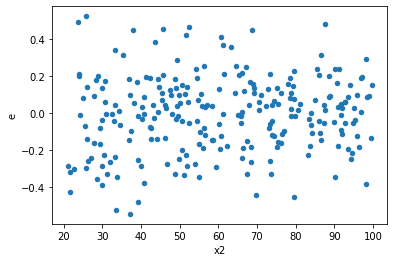

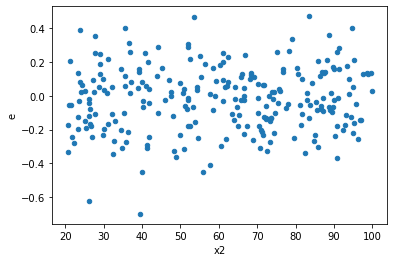

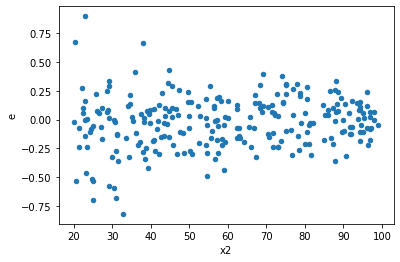

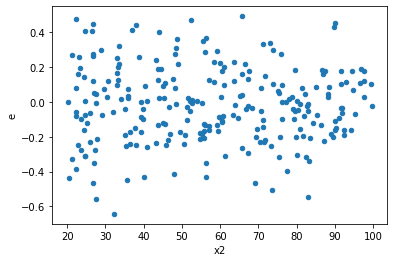

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,113.0,133.0,3.488469623221853,9.626477234226986,0.030871412594883657,0.07237952807689463,2.3445486290734276,2.7469795964574217e-06,0.9999986265102018,1.3734897982287109e-06,Reject001=0 : Heteroscedasticity
1.0,114.0,132.0,3.2536319959183224,7.523897807478919,0.02854063154314318,0.056999225814234236,1.9971255971708926,0.0001353395002909874,0.9999323302498545,6.76697501454937e-05,Reject001=0 : Heteroscedasticity
2.0,124.0,122.0,4.528120084882826,6.034397634627903,0.03651709745873247,0.049462275693671336,1.354496362958969,0.09398216116035307,0.9530089194198235,0.046991080580176536,Reject001=1 : Homoscedasticity
12.0,121.0,125.0,4.293886774969623,4.491106821429075,0.035486667561732424,0.0359288545714326,1.0124606518470902,0.9445892446335489,0.5277053776832256,0.47229462231677444,Reject001=1 : Homoscedasticity
13.0,126.0,120.0,6.208588523190707,7.071262495499143,0.049274512088815135,0.058927187462492855,1.1958959097612007,0.3237049971255346,0.8381475014372327,0.1618524985627673,Reject001=1 : Homoscedasticity
14.0,127.0,119.0,3.912575350290102,5.891748771447283,0.03080767992354411,0.049510493877708256,1.6070828442965912,0.0092310278322425,0.9953844860838788,0.00461551391612125,Reject001=0 : Heteroscedasticity
16.0,124.0,122.0,3.400865278689788,5.188319975295934,0.027426332892659583,0.042527212912261754,1.550597853482767,0.015698690069452903,0.9921506549652735,0.007849345034726452,Reject001=1 : Homoscedasticity
18.0,119.0,127.0,3.7672662810297757,8.10310042736083,0.03165769984058635,0.06380394037291992,2.0154319705539976,0.00011617861874757551,0.9999419106906262,5.8089309373787756e-05,Reject001=0 : Heteroscedasticity
19.0,135.0,111.0,4.810913158929891,5.383471968447854,0.035636393769851046,0.048499747463494176,1.3609611504665136,0.09299912457050263,0.9535004377147487,0.04649956228525132,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,113.0,133.0,3.488469623221853,9.626477234226986,0.030871412594883657,0.07237952807689463,2.3445486290734276,2.7469795964574217e-06,Reject001=0 : Heteroscedasticity
1.0,114.0,132.0,3.2536319959183224,7.523897807478919,0.02854063154314318,0.056999225814234236,1.9971255971708926,0.0001353395002909874,Reject001=0 : Heteroscedasticity
2.0,124.0,122.0,4.528120084882826,6.034397634627903,0.03651709745873247,0.049462275693671336,1.354496362958969,0.09398216116035307,Reject001=1 : Homoscedasticity
3.0,113.0,133.0,6.681164071708168,5.387494747969702,0.05912534576732892,0.040507479308042875,0.6851119225154066,0.03898521367384316,Reject001=1 : Homoscedasticity
4.0,113.0,133.0,7.764072964630347,3.090779917958494,0.06870861030646325,0.023238946751567624,0.3382246656993089,8.479912354287777e-09,Reject001=0 : Heteroscedasticity
5.0,125.0,121.0,6.380310711335477,3.2165208550732323,0.05104248569068382,0.0265828169840763,0.5207978534816564,0.0003359958836144863,Reject001=0 : Heteroscedasticity
6.0,129.0,117.0,5.871876930350543,4.262887040527028,0.04551842581667087,0.03643493197031648,0.8004435855726009,0.21711343642174222,Reject001=1 : Homoscedasticity
7.0,133.0,113.0,5.378157312419265,3.642676571482305,0.040437273025708764,0.03223607585382571,0.7971871850342384,0.20852564799949486,Reject001=1 : Homoscedasticity
8.0,131.0,115.0,7.275220659394901,5.239686606386517,0.05553603556790001,0.04556249222944797,0.8204131203017168,0.2719872532556381,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      576
Reject001=0 : Heteroscedasticity    424
Name: Result_test, dtype: int64